#  Electric Range Prediction for Vehicles

***Objective:***

The goal of this project is to develop a regression model to predict the Electric Range of vehicles based on various attributes in the dataset. The dataset contains numerous features related to the vehicle's characteristics, such as make, model, transaction data, and other parameters.

***PRE-PROCESSING***

***1. Import required libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

***Read the data***

In [4]:
data=pd.read_csv("Electric_Vehicle_Title_and_Registration.csv")

In [5]:
df=pd.DataFrame(data)

In [6]:
df.head(2)

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Primary Use,Electric Range,Odometer Reading,Odometer Reading Description,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 GEOID,Legislative District,Electric Utility
0,Plug-in Hybrid Electric Vehicle (PHEV),WBY8P8C51K,477294338,2019,BMW,i3,Passenger,126,14,Actual Mileage,...,False,Battery range requirement is met,"Vehicle purchase was before August 01, 2019",The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1,Battery Electric Vehicle (BEV),3FMTK4SE2P,233490204,2023,FORD,Mustang Mach-E,Passenger,0,11,Actual Mileage,...,False,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [7]:
df.tail(2)

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Primary Use,Electric Range,Odometer Reading,Odometer Reading Description,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 GEOID,Legislative District,Electric Utility
1048573,Battery Electric Vehicle (BEV),7SAYGDEE0P,259960711,2023,TESLA,Model Y,Passenger,0,0,Odometer reading is not collected at time of r...,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,No,No,No,5.306105e+10,1.0,PUGET SOUND ENERGY INC
1048574,Battery Electric Vehicle (BEV),7SAYGDEE0P,259960711,2023,TESLA,Model Y,Passenger,0,0,Odometer reading is not collected at time of r...,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,Yes,Yes,No,5.306105e+10,1.0,PUGET SOUND ENERGY INC


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                                                           Non-Null Count    Dtype  
---  ------                                                           --------------    -----  
 0   Clean Alternative Fuel Vehicle Type                              1048575 non-null  object 
 1   VIN (1-10)                                                       1048575 non-null  object 
 2   DOL Vehicle ID                                                   1048575 non-null  int64  
 3   Model Year                                                       1048575 non-null  int64  
 4   Make                                                             1048575 non-null  object 
 5   Model                                                            1048575 non-null  object 
 6   Primary Use                                                      1048575 non-null  object 
 7   Electric Range    

In [9]:
df.describe()

,DOL Vehicle ID,Model Year,Electric Range,Odometer Reading,Sale Price,Base MSRP,Year,Postal Code,2020 GEOID,Legislative District
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048536e+06,1.048551e+06,1.046687e+06
mean,2.160640e+08,2.019097e+03,7.797021e+01,2.777533e+03,1.124515e+04,2.182388e+03,2.021321e+03,9.818380e+04,5.298674e+10,3.011549e+01
std,9.026526e+07,3.642463e+00,9.477896e+01,1.212718e+04,3.015412e+04,1.201559e+04,2.751911e+00,1.956645e+03,1.430027e+09,1.476624e+01
min,4.000000e+00,1.993000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e+03,7.450000e+02,1.045020e+09,1.000000e+00
25%,1.587238e+08,2.016000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.020000e+03,9.804500e+04,5.303301e+10,1.800000e+01
50%,2.182318e+08,2.020000e+03,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.022000e+03,9.811700e+04,5.303303e+10,3.400000e+01
75%,2.601797e+08,2.022000e+03,1.500000e+02,1.100000e+01,0.000000e+00,0.000000e+00,2.023000e+03,9.834900e+04,5.305307e+10,4.300000e+01
max,4.792548e+08,2.025000e+03,3.370000e+02,9.626190e+05,1.231202e+07,8.450000e+05,2.024000e+03,9.980100e+04,7.212700e+10,4.900000e+01


In [10]:
df.shape

(1048575, 34)

In [11]:
df.isnull().sum()

Clean Alternative Fuel Vehicle Type                                     0
VIN (1-10)                                                              0
DOL Vehicle ID                                                          0
Model Year                                                              0
Make                                                                    0
Model                                                                   0
Primary Use                                                             0
Electric Range                                                          0
Odometer Reading                                                        0
Odometer Reading Description                                            0
New or Used Vehicle                                                     0
Sale Price                                                              0
Sale Date                                                          757311
Base MSRP                             

In [12]:
df.isna().sum()

Clean Alternative Fuel Vehicle Type                                     0
VIN (1-10)                                                              0
DOL Vehicle ID                                                          0
Model Year                                                              0
Make                                                                    0
Model                                                                   0
Primary Use                                                             0
Electric Range                                                          0
Odometer Reading                                                        0
Odometer Reading Description                                            0
New or Used Vehicle                                                     0
Sale Price                                                              0
Sale Date                                                          757311
Base MSRP                             

In [13]:
df.duplicated().sum()

325

In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [15]:
df1=df.drop(["Transportation Electrification Fee Paid","Hybrid Vehicle Electrification Fee Paid","Legislative District",
         "Sale Date","Postal Code","County","City","2020 GEOID","Electric Utility"],axis=1)

In [16]:
df1.columns

Index(['Clean Alternative Fuel Vehicle Type', 'VIN (1-10)', 'DOL Vehicle ID',
       'Model Year', 'Make', 'Model', 'Primary Use', 'Electric Range',
       'Odometer Reading', 'Odometer Reading Description',
       'New or Used Vehicle', 'Sale Price', 'Base MSRP', 'Transaction Type',
       'Transaction Date', 'Year', 'State',
       '2019 HB 2042: Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Meets 2019 HB 2042 Electric Range Requirement',
       'Meets 2019 HB 2042 Sale Date Requirement',
       'Meets 2019 HB 2042 Sale Price/Value Requirement',
       '2019 HB 2042: Battery Range Requirement',
       '2019 HB 2042: Purchase Date Requirement',
       '2019 HB 2042: Sale Price/Value Requirement',
       'Electric Vehicle Fee Paid'],
      dtype='object')

***2)Handling Outliers***

In [17]:
numeric_columns=df1.select_dtypes(include="number")
numeric_columns.head(3)

,DOL Vehicle ID,Model Year,Electric Range,Odometer Reading,Sale Price,Base MSRP,Year
0,477294338,2019,126,14,51500,0,2019
1,233490204,2023,0,11,66330,0,2023
2,478657924,2019,220,0,0,0,2022


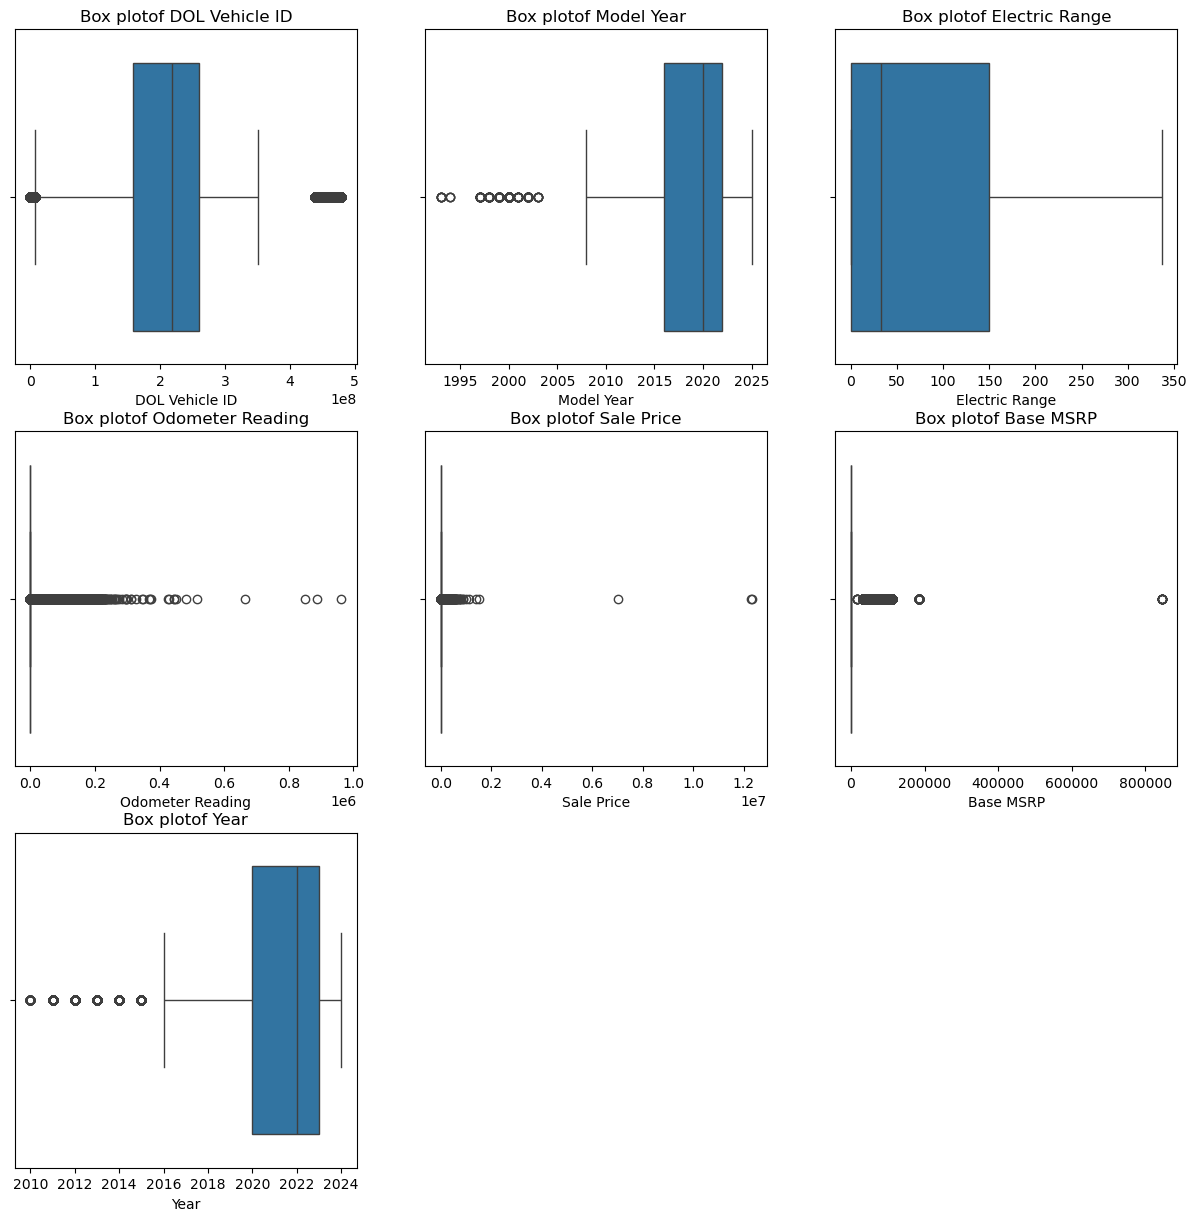

In [18]:
plt.figure(figsize=(15,20))
for i,col in enumerate(numeric_columns):
    plt.subplot(4,3,i+1)
    plt.title(f"Box plotof {col}")
    sns.boxplot(data=df1, x=col)
#plt.tight_layout()
plt.show()  

In [19]:
def handling_outliers(df1):
    for col in df1.select_dtypes(include="number"):
        Q1=df1[col].quantile(0.25)
        Q3=df1[col].quantile(0.75)
        IQR=Q3-Q1
        Lower_bound=Q1-(IQR*1.5)
        Upper_bound=Q3+(IQR*1.5)
        #Capping outliers
        df1[col]=df1[col].apply(lambda x:Lower_bound if x<Lower_bound else (Upper_bound if x>Upper_bound else x))
    return df1

In [20]:
df2=handling_outliers(df1)

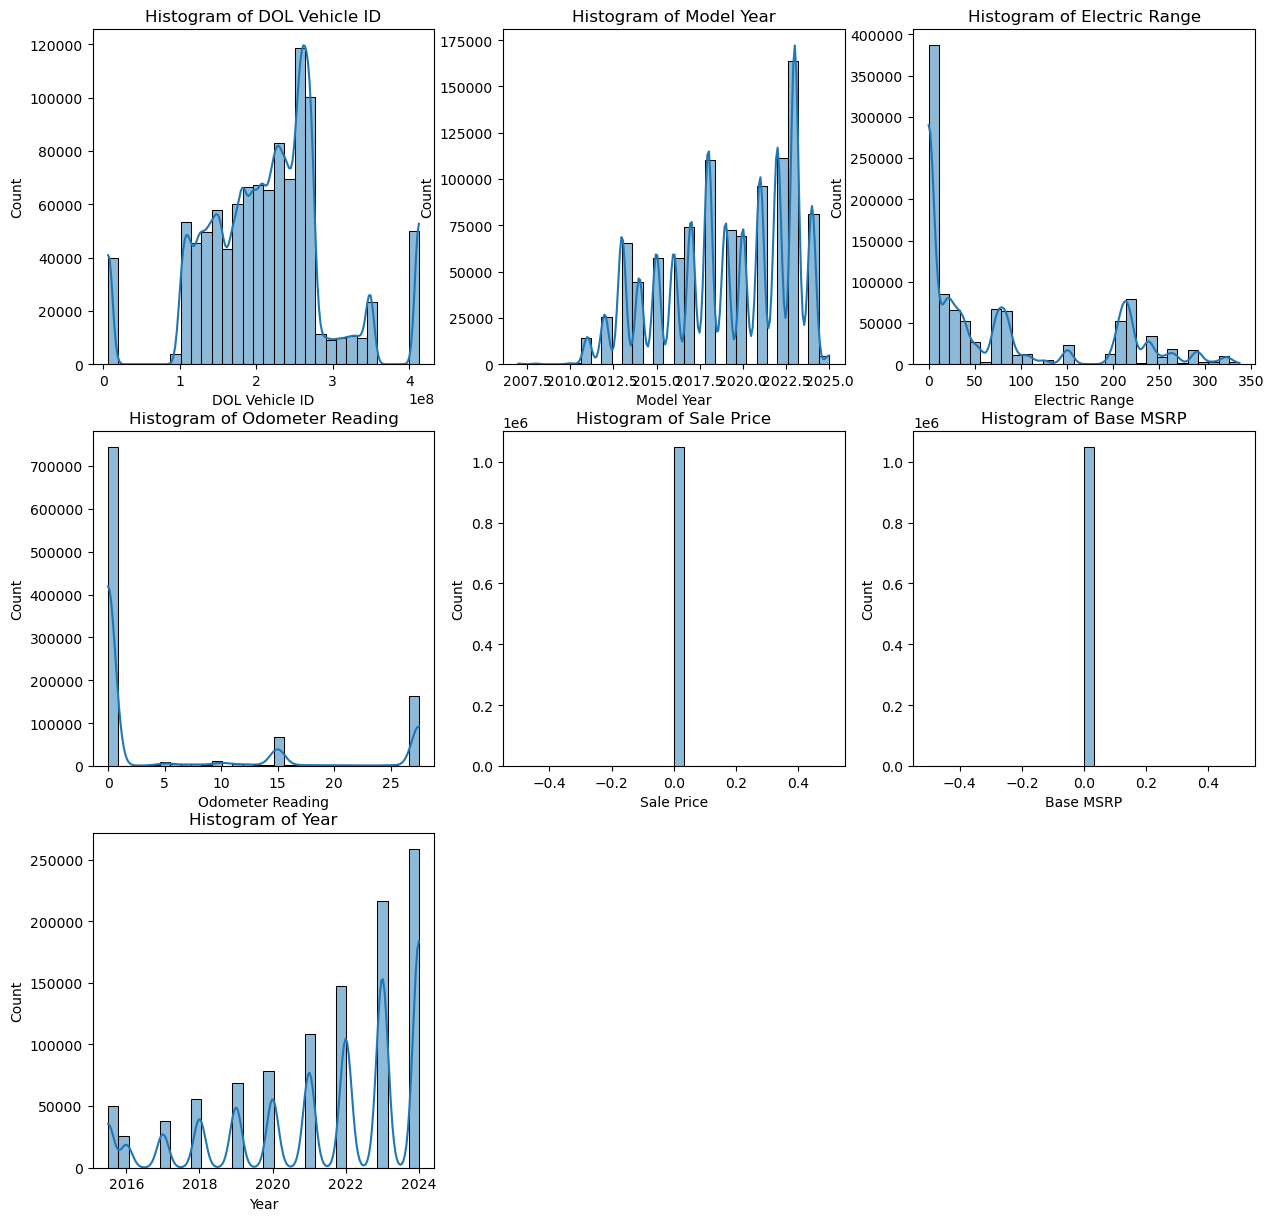

In [21]:
plt.figure(figsize=(15,20))
for i,col in enumerate(numeric_columns):
    plt.subplot(4,3,i+1)
    plt.title(f"Histogram of {col}")
    sns.histplot(df2[col], bins=30, kde=True, edgecolor='black')
#plt.tight_layout()
plt.show()

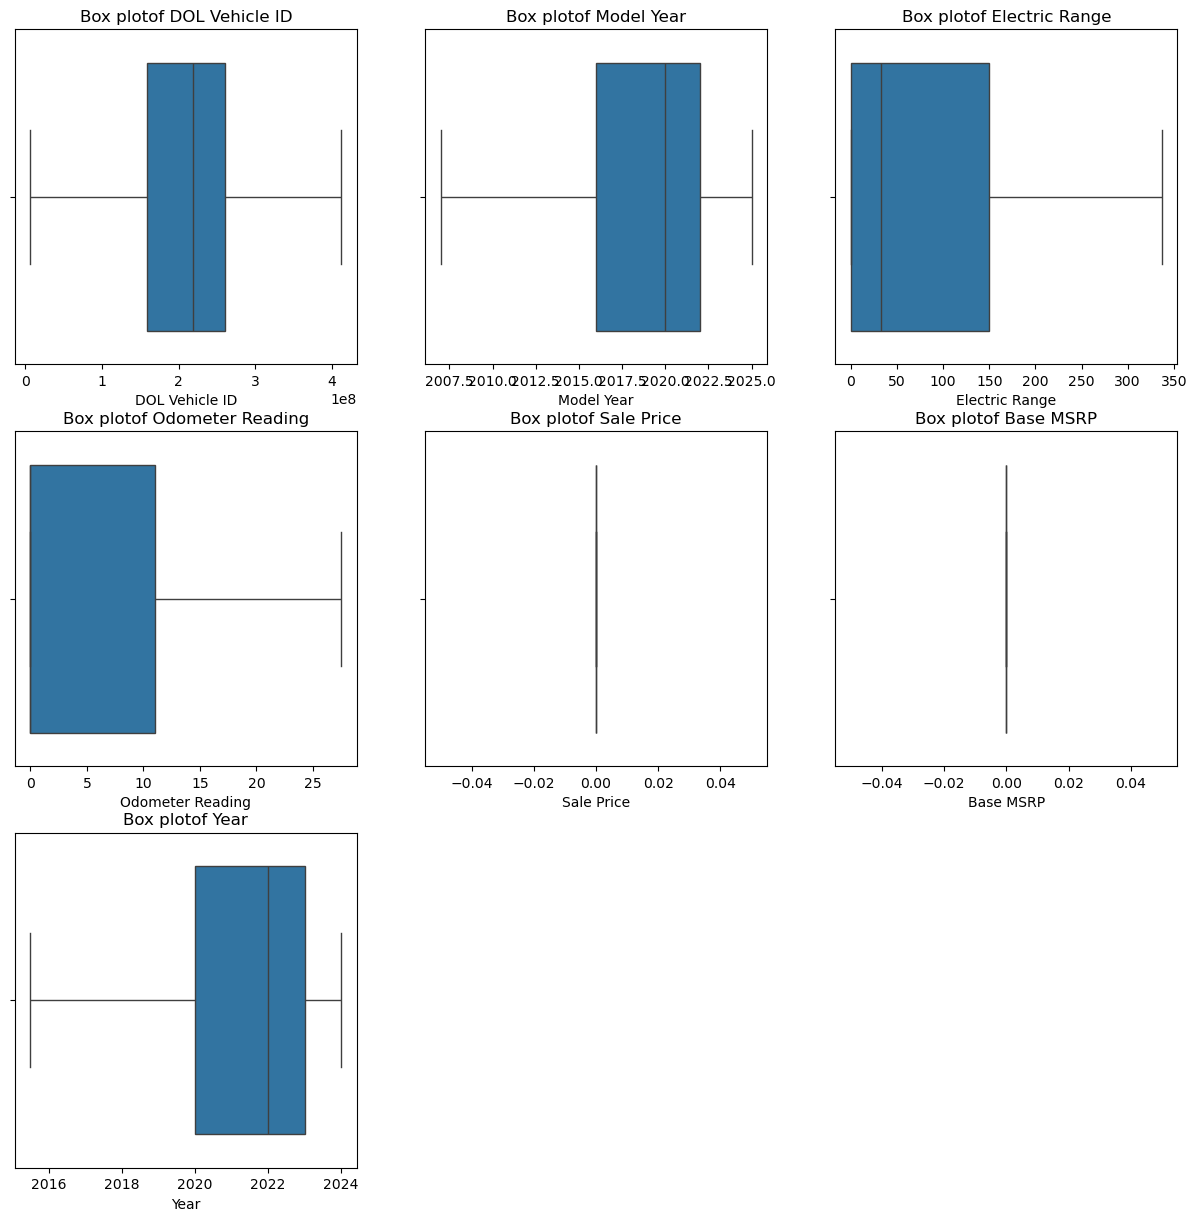

In [22]:
plt.figure(figsize=(15,20))
for i,col in enumerate(numeric_columns):
    plt.subplot(4,3,i+1)
    plt.title(f"Box plotof {col}")
    sns.boxplot(data=df2, x=col)
#plt.tight_layout()
plt.show()  

***Need to remove 'Sale Price' and'Base MSRP'***

In [23]:
numeric_features=df2.select_dtypes(include=["float64","int64"]).columns
numeric_features

Index(['DOL Vehicle ID', 'Model Year', 'Electric Range', 'Odometer Reading',
       'Sale Price', 'Base MSRP', 'Year'],
      dtype='object')

In [24]:
print(df2[numeric_features].skew())

DOL Vehicle ID      0.064902
Model Year         -0.430614
Electric Range      1.006929
Odometer Reading    1.328527
Sale Price          0.000000
Base MSRP           0.000000
Year               -0.891451
dtype: float64


In [25]:
df3=df2.copy()

In [26]:
df3=df3.drop(["Sale Price", "Base MSRP"],axis=1)

In [27]:
numeric_features=df3.select_dtypes(include=["float64","int64"]).columns
numeric_features

Index(['DOL Vehicle ID', 'Model Year', 'Electric Range', 'Odometer Reading',
       'Year'],
      dtype='object')

In [28]:
pt=PowerTransformer(method='yeo-johnson')

In [29]:
df2["Electric Range"] = pt.fit_transform(df2[["Electric Range"]])

In [30]:
df2["Odometer Reading"] = pt.fit_transform(df2[["Odometer Reading"]])

In [31]:
print(df2[numeric_features].skew())

DOL Vehicle ID      0.064902
Model Year         -0.430614
Electric Range     -0.129420
Odometer Reading    0.933718
Year               -0.891451
dtype: float64


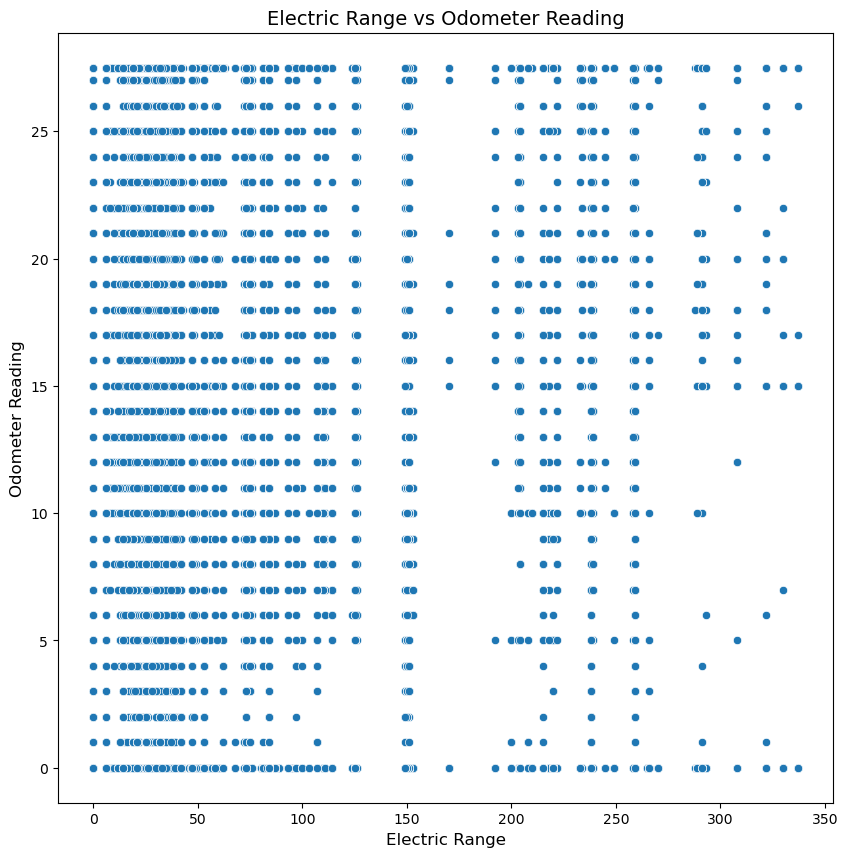

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Electric Range', y='Odometer Reading', data=df3)
plt.title('Electric Range vs Odometer Reading', fontsize=14)
plt.xlabel('Electric Range', fontsize=12)
plt.ylabel('Odometer Reading', fontsize=12)
plt.show()

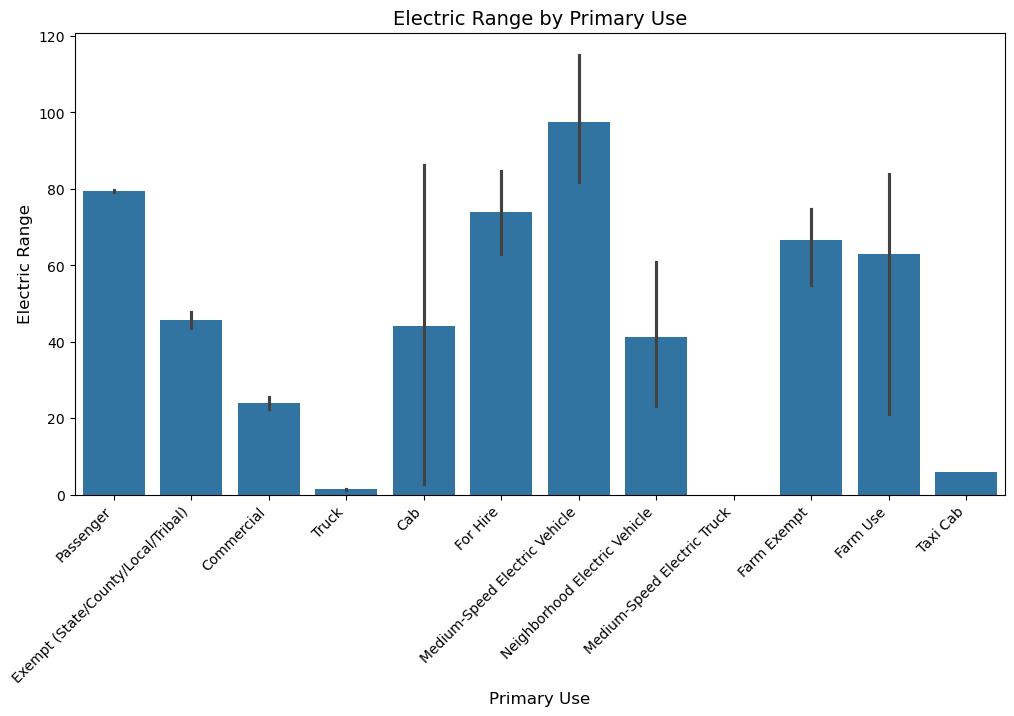

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Primary Use', y='Electric Range', data=df3)
plt.title('Electric Range by Primary Use', fontsize=14)
plt.xlabel('Primary Use', fontsize=12)
plt.ylabel('Electric Range', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

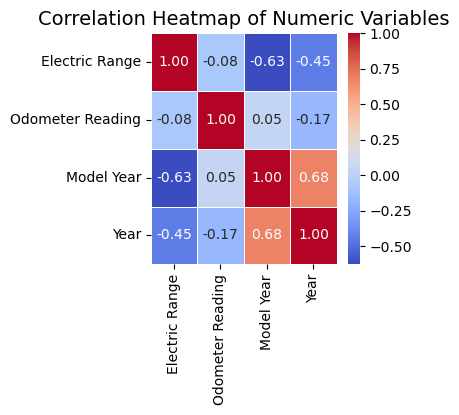

In [34]:
numeric_columns = ['Electric Range','Odometer Reading','Model Year','Year']
df_numeric = df2[numeric_columns]
corr_matrix = df_numeric.corr()
plt.figure(figsize=(3,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables', fontsize=14)
plt.show()

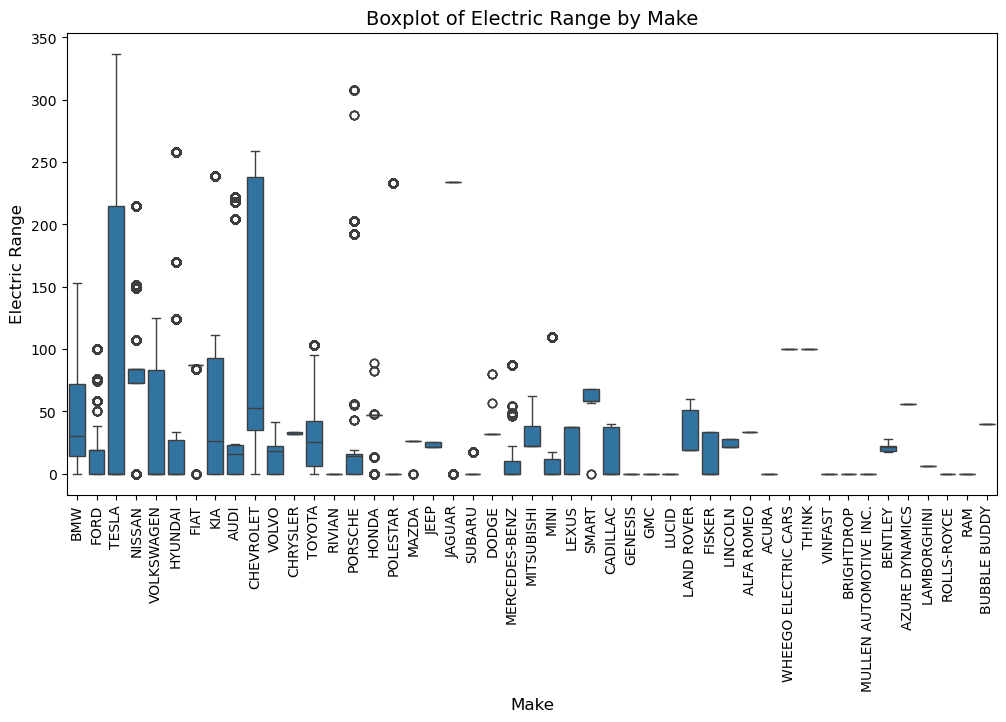

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Electric Range', data=df3)
plt.title('Boxplot of Electric Range by Make', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Electric Range', fontsize=12)
plt.xticks(rotation=90)
plt.show()

***ENCODING***

***FEATURE SELECTION***

In [36]:
X=df3.drop("Electric Range",axis=1)
y=df3["Electric Range"]

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
num_col_names=df3.select_dtypes(include="number").columns
num_col_names

Index(['DOL Vehicle ID', 'Model Year', 'Electric Range', 'Odometer Reading',
       'Year'],
      dtype='object')

In [39]:
num_col=['DOL Vehicle ID', 'Model Year', 'Odometer Reading','Year']
cat_col=df3.select_dtypes(include="object").columns

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [41]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [42]:
preprocess=ColumnTransformer(transformers=
        [("num", imputer, num_col),("numeric",StandardScaler(),num_col),
         ("cat",OneHotEncoder(handle_unknown="ignore"),cat_col)])
X_train_scaled = preprocess.fit_transform(X_train)
X_test_scaled = preprocess.transform(X_test)

In [43]:
X_train_scaled=imputer.fit_transform(X_train_scaled)
X_test_scaled= imputer.transform(X_test_scaled)

In [44]:
selector=SelectKBest(k=10)

In [45]:
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_scaled = preprocess.transform(X_test)
X_test_selected = selector.transform(X_test_scaled)

***MODEL BUILDING***

In [46]:
models={
    "1.Linear Regression":LinearRegression(),
    "2. Decision TreeRegressor": DecisionTreeRegressor(),
}

In [47]:
results={}
for model_name,model in models.items():
    model.fit(X_train_selected,y_train)
    y_pred=model.predict(X_test_selected)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    results[model_name]={"MAE":mae,"MSE":mse,"RMASE":rmse,"R2 score":r2}

In [48]:
Result_df=pd.DataFrame(results).T
Result_df

,MAE,MSE,RMASE,R2 score
1.Linear Regression,73.452272,8461.491492,91.986366,0.063228
2. Decision TreeRegressor,73.452266,8461.491477,91.986366,0.063228


In [49]:
models={
     "3. Random Forest Regressor": RandomForestRegressor(),
    "4. Gradient Boosting Regressor": GradientBoostingRegressor(),
}

In [50]:
results={}
for model_name,model in models.items():
    model.fit(X_train_selected,y_train)
    y_pred=model.predict(X_test_selected)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    results[model_name]={"MAE":mae,"MSE":mse,"RMASE":rmse,"R2 score":r2}

In [51]:
Result_df=pd.DataFrame(results).T
Result_df

,MAE,MSE,RMASE,R2 score
3. Random Forest Regressor,73.447752,8461.506718,91.986449,0.063226
4. Gradient Boosting Regressor,73.454897,8461.496926,91.986395,0.063227
